<a href="https://colab.research.google.com/github/vertelet/github.io/blob/main/getting_around_Kwant.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install kwant

     |████████████████████████████████| 1.7 MB 18.8 MB/s 
  Created wheel for kwant: filename=kwant-1.4.2-cp37-cp37m-linux_x86_64.whl size=3774814 sha256=20e73cde0c4a8f3b9af237f342e2068e0ad975c20e5e7b2bc785168327e6e2de
  Stored in directory: /root/.cache/pip/wheels/3e/a5/99/2e39c66ab8c9158d0a50da43c7e414252c2c5c23871a38b27d
  Created wheel for tinyarray: filename=tinyarray-1.2.4-cp37-cp37m-linux_x86_64.whl size=227997 sha256=cc8e715ce80162b8f83e8d05d1074f4d130e6b4f33d96dfaade4d54492c2d42d
  Stored in directory: /root/.cache/pip/wheels/85/c6/1c/6939e2931cfbff5df75758a06084bf67171b640ebdf5febd35
Successfully built kwant tinyarray


In [ ]:
import kwant

/usr/local/lib/python3.7/dist-packages/kwant/solvers/default.py:18: RuntimeWarning: MUMPS is not available, SciPy built-in solver will be used as a fallback. Performance can be very poor in this case.
  "Performance can be very poor in this case.", RuntimeWarning)


In [ ]:
def disk(pos):
    x, y = pos
    return x**2 + y**2 < 8**2

lat = kwant.lattice.honeycomb()
syst = kwant.Builder()
syst[lat.shape(disk, (0, 0))] = 0
syst[lat.neighbors()] = -1

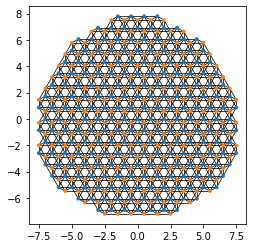

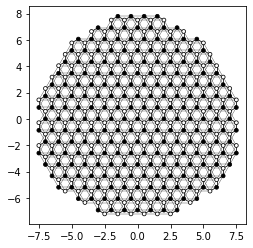

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:61: RuntimeWarning: The plotted data contains 1.69% of values overflowing upper limit 0.0280641 


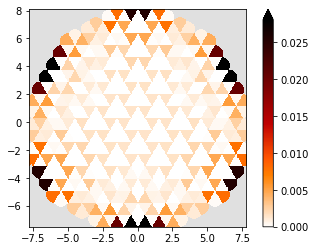

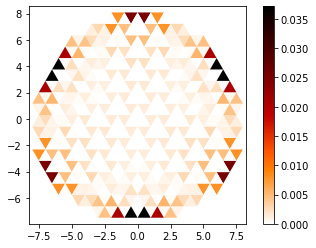

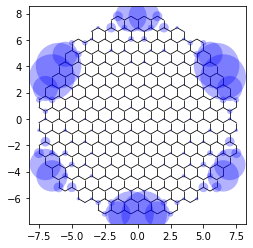

In [ ]:
# Tutorial 2.8.1. 2D example: graphene quantum dot
# ================================================
#
# Physics background
# ------------------
#  - graphene edge states
#
# Kwant features highlighted
# --------------------------
#  - demonstrate different ways of plotting

import kwant
from matplotlib import pyplot

lat = kwant.lattice.honeycomb()
a, b = lat.sublattices

def make_system(r=8, t=-1, tp=-0.1):

    def circle(pos):
        x, y = pos
        return x**2 + y**2 < r**2

    syst = kwant.Builder()
    syst[lat.shape(circle, (0, 0))] = 0
    syst[lat.neighbors()] = t
    syst.eradicate_dangling()
    if tp:
        syst[lat.neighbors(2)] = tp

    return syst


def plot_system(syst):
    kwant.plot(syst)
    # the standard plot is ok, but not very intelligible. One can do
    # better by playing wioth colors and linewidths

    # use color and linewidths to get a better plot
    def family_color(site):
        return 'black' if site.family == a else 'white'

    def hopping_lw(site1, site2):
        return 0.04 if site1.family == site2.family else 0.1

    kwant.plot(syst, site_lw=0.1, site_color=family_color, hop_lw=hopping_lw)


def plot_data(syst, n):
    import scipy.linalg as la

    syst = syst.finalized()
    ham = syst.hamiltonian_submatrix()
    evecs = la.eigh(ham)[1]

    wf = abs(evecs[:, n])**2

    # the usual - works great in general, looks just a bit crufty for
    # small systems

    kwant.plotter.map(syst, wf, oversampling=10, cmap='gist_heat_r')

    # use two different sort of triangles to cleanly fill the space
    def family_shape(i):
        site = syst.sites[i]
        return ('p', 3, 180) if site.family == a else ('p', 3, 0)

    def family_color(i):
        return 'black' if syst.sites[i].family == a else 'white'

    kwant.plot(syst, site_color=wf, site_symbol=family_shape,
               site_size=0.5, hop_lw=0, cmap='gist_heat_r')

    # plot by changing the symbols itself
    def site_size(i):
        return 3 * wf[i] / wf.max()

    kwant.plot(syst, site_size=site_size, site_color=(0, 0, 1, 0.3),
               hop_lw=0.1)


def main():
    # plot the graphene system in different styles
    syst = make_system()

    plot_system(syst)

    # compute a wavefunction (number 225) and plot it in different
    # styles
    syst = make_system(tp=0)

    plot_data(syst, 225)


# Call the main function if the script gets executed (as opposed to imported).
# See <http://docs.python.org/library/__main__.html>.
if __name__ == '__main__':
    main()